In [1]:
import pandas as pd
import seaborn as sns

In [2]:
def filter_zeroes_rank(rank):
    return rank[rank != 0]

def reciprocal_rank_fusion(rank, c):
    return 1/(c + rank)

def squared_rrf(rank):
    return 1/(rank**2)

def rank_value(rank, c):
    return 1/(rank + c)**2

def mandelbrot_rank(rank,c,n):
    denom = sum([rank_value(i, c) for i in range(1, n+1)])
    num = rank_value(rank, c)
    return num/denom

In [3]:
results_rrf=[]
for i in range(1, 501):
    results_rrf.append((i,reciprocal_rank_fusion(i, 3), reciprocal_rank_fusion(i, 60), reciprocal_rank_fusion(i, 500), squared_rrf(i),mandelbrot_rank(i, 3, 10), mandelbrot_rank(i, 60, 10), mandelbrot_rank(i, 500, 10), mandelbrot_rank(i, 60, 5), mandelbrot_rank(i, 60, 30), mandelbrot_rank(i, 60, 50)))    


df_rank_functions = pd.DataFrame(results_rrf, columns=['rank','rrf-3','rrf-60','rrf-500', 'srrf','mrrf-3-10', 'mrrf-60-10', 'mrrf-500-10','mrrf-60-5', 'mrrf-60-30', 'mrrf-60-50'])


In [4]:
df_compare_rrf_mrrf_srrf = df_rank_functions[['rank', 'rrf-60', 'srrf','mrrf-60-10']]

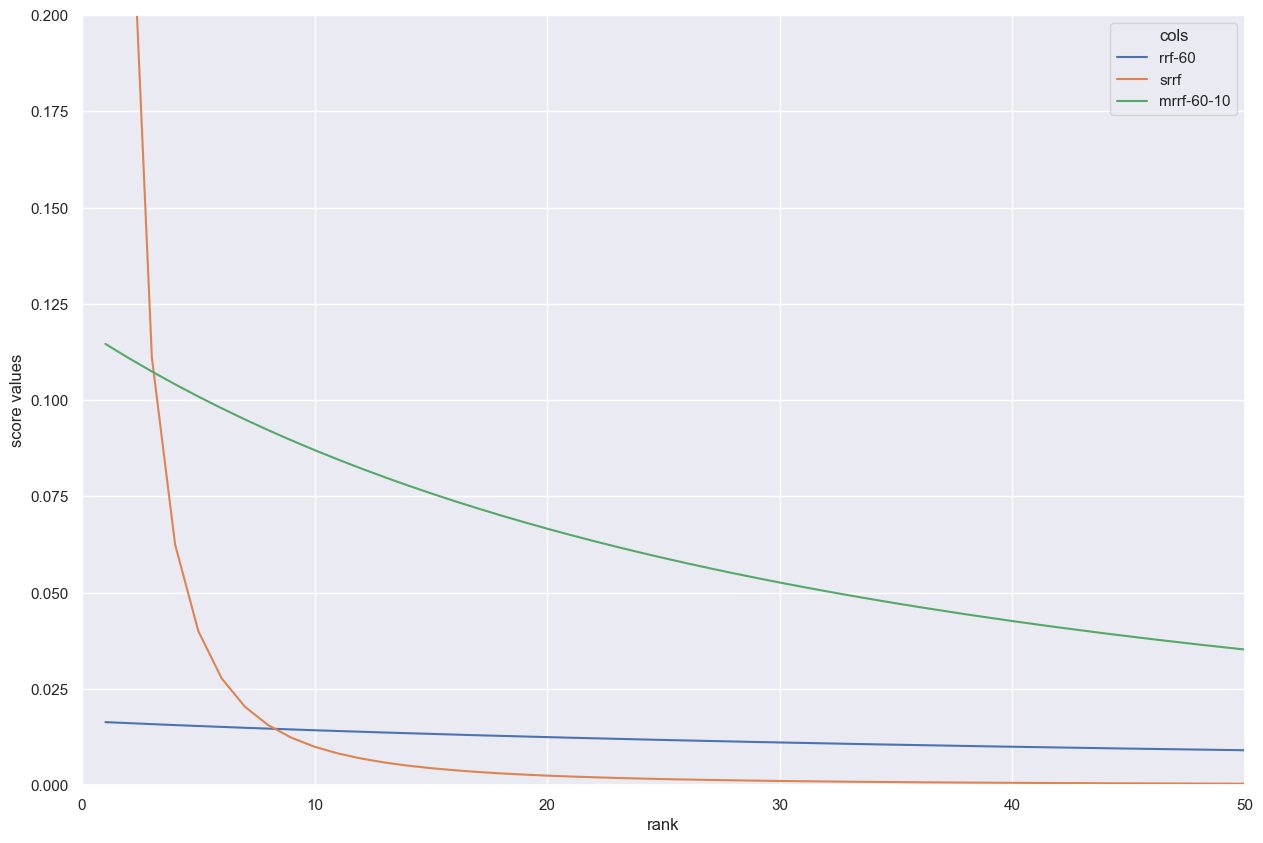

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

plt.figure(figsize=(15,10))
plt.ylim(0.0, 0.20)
plt.xlim(0, 50)


dfm = df_compare_rrf_mrrf_srrf.melt('rank', var_name='cols', value_name='score values')
# Plot the responses for different events and regions
sns.lineplot(x="rank", y="score values",
             hue="cols",
             data=dfm)

plt.savefig('multicompare.png', dpi=300, bbox_inches='tight', pad_inches=0)

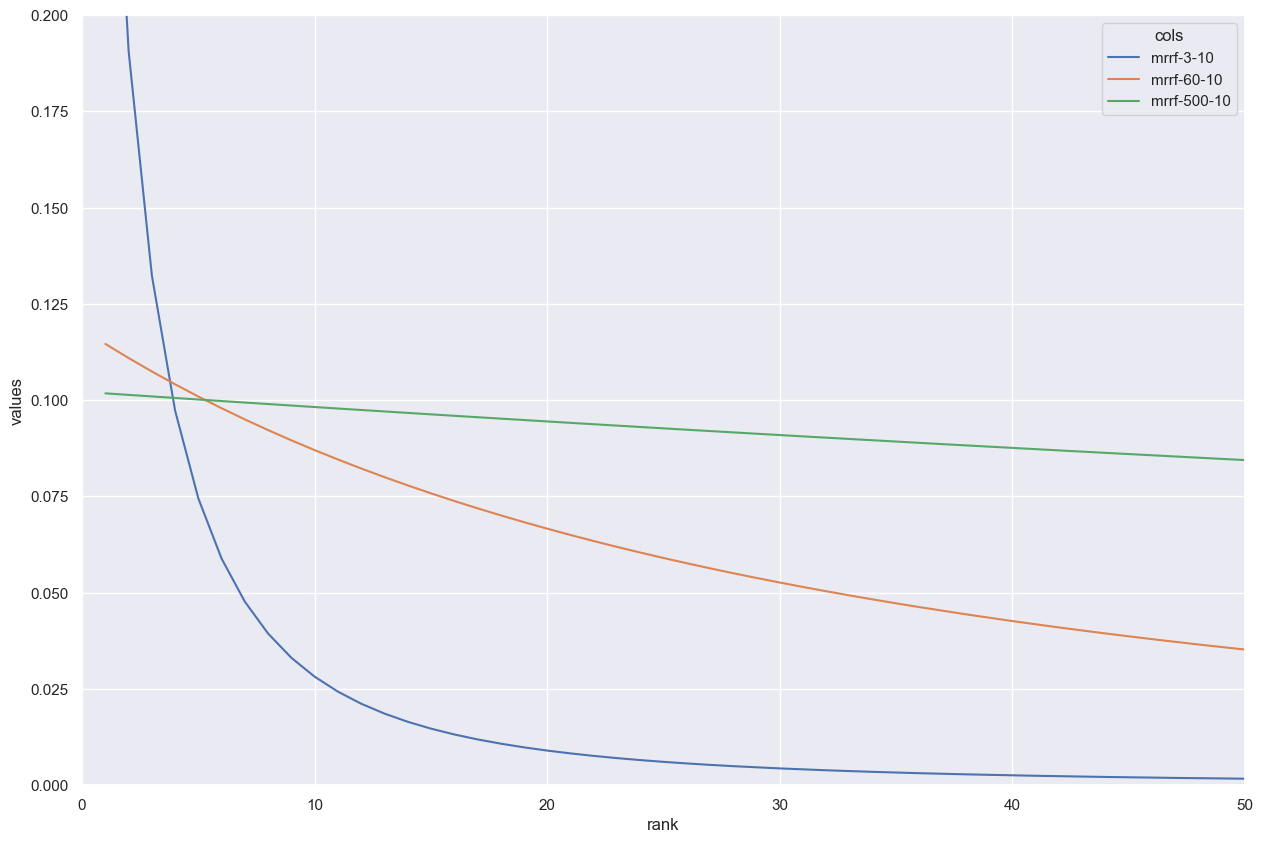

In [6]:
plt.figure(figsize=(15,10))
plt.ylim(0.0, 0.20)
plt.xlim(0, 50)

df_mrrf = df_rank_functions[['rank','mrrf-3-10','mrrf-60-10','mrrf-500-10']]
dfm2 = df_mrrf.melt('rank', var_name='cols', value_name='score values')
# Plot the responses for different events and regions
sns.lineplot(x="rank", y="score values",
             hue="cols",
             data=dfm2)

plt.savefig('mrrf_multi_q.png', dpi=300, bbox_inches='tight', pad_inches=0)

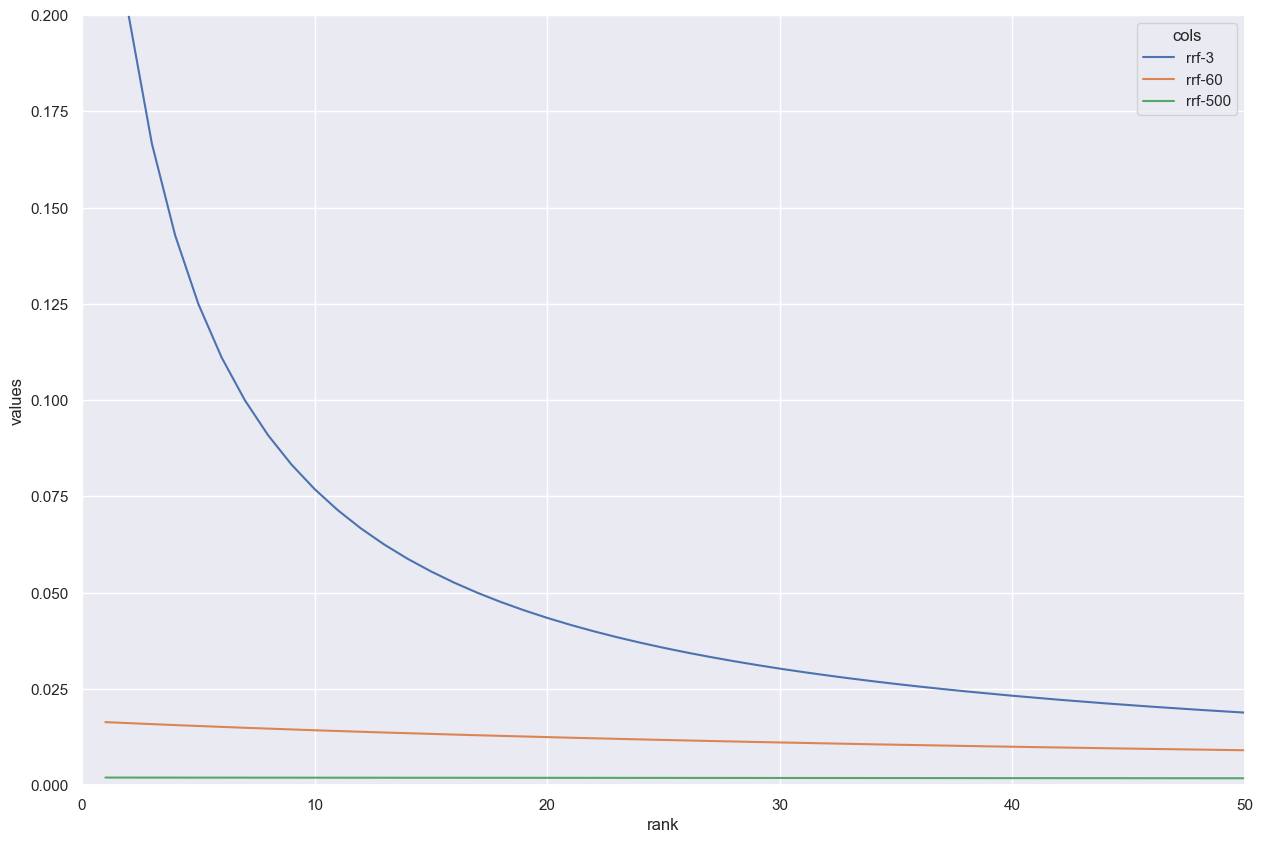

In [7]:
plt.figure(figsize=(15,10))
plt.ylim(0.0, 0.20)
plt.xlim(0, 50)

df_rrf = df_rank_functions[['rank','rrf-3','rrf-60','rrf-500']]
dfm3 = df_rrf.melt('rank', var_name='cols', value_name='score values')
# Plot the responses for different events and regions
sns.lineplot(x="rank", y="score values",
             hue="cols",
             data=dfm3)

plt.savefig('rrf_multi_k.png', dpi=300, bbox_inches='tight', pad_inches=0)

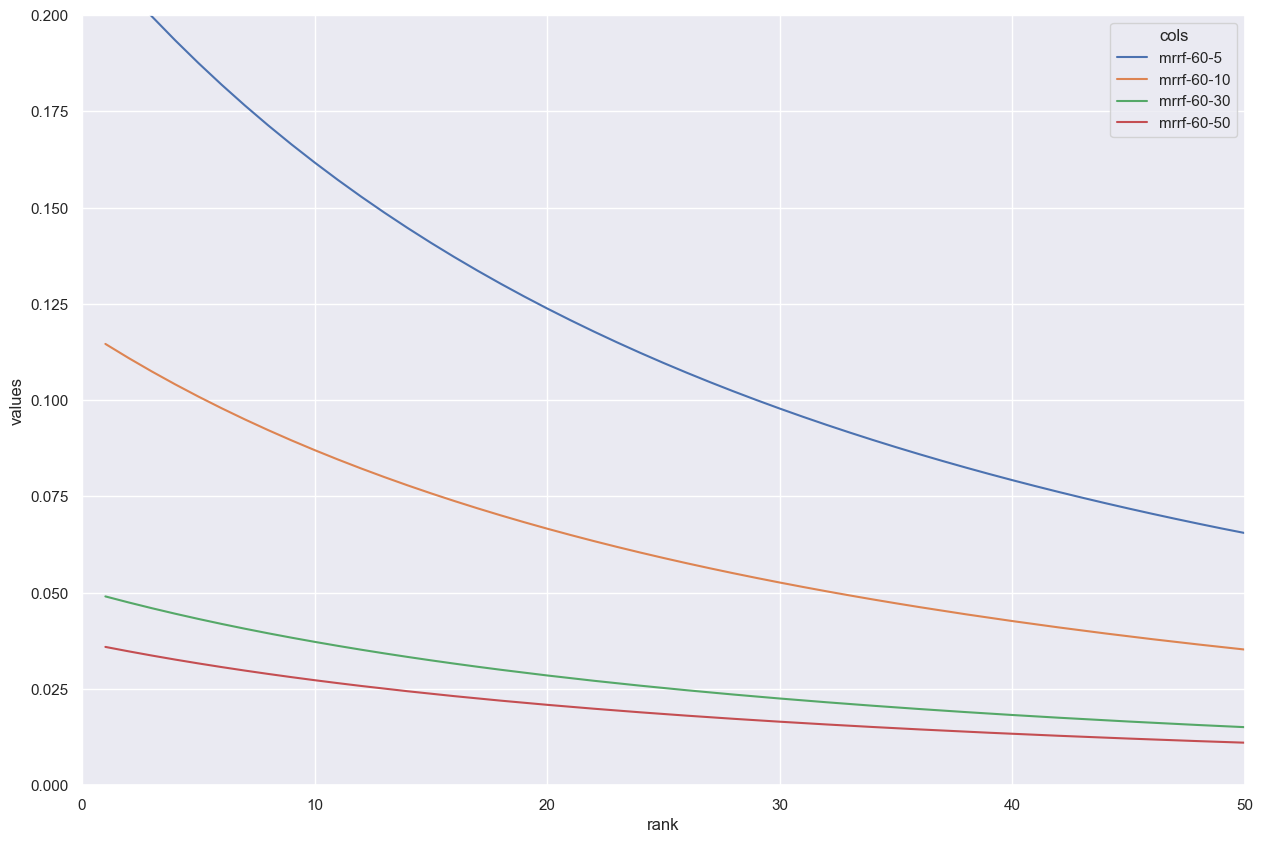

In [8]:
plt.figure(figsize=(15,10))
plt.ylim(0.0, 0.20)
plt.xlim(0, 50)

df_rrf = df_rank_functions[['rank','mrrf-60-5','mrrf-60-10','mrrf-60-30', 'mrrf-60-50']]
dfm3 = df_rrf.melt('rank', var_name='cols', value_name='score values')
# Plot the responses for different events and regions
sns.lineplot(x="rank", y="score values",
             hue="cols",
             data=dfm3)

plt.savefig('mrrf_multi_N.png', dpi=300, bbox_inches='tight', pad_inches=0)